K Nearest Neighbor Model for Harambee Data Set

In [1]:
#import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#import cleaned data
df = pd.read_csv('wrangled_no_up.csv')
df.head()

,cft_score,opt_score,com_score,grit_score,gender,peoplelive,numchildren,numearnincome,anygrant,anyhhincome,financial_situation_now,financial_situation_5years,givemoney_yes,working,age_first_survey
0,4.0,4.6,4.0,4.0,1.0,3.6,0.8,0.8,0.0,0.0,2.8,8.4,0.4,1.0,26.0
1,4.0,7.0,5.0,3.0,1.0,2.0,3.0,1.0,1.0,1.0,2.0,8.0,0.0,1.0,28.0
2,5.0,3.0,5.0,2.0,0.0,4.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,25.0
3,10.0,4.0,6.6,0.0,1.0,7.0,0.0,1.0,1.0,1.0,1.0,7.0,0.0,1.0,20.0
4,7.0,4.4,5.0,4.0,0.0,2.8,0.2,1.2,0.4,0.6,4.0,8.2,1.0,0.0,21.0


In [3]:
#check amounts of working and non-working individuals
df.working.value_counts()

0.0    21963
1.0    10916
Name: working, dtype: int64

In [4]:
#number of observations and features
df.shape

(32879, 15)

In [5]:
#ensure no missing values in data
df.isna().sum()

cft_score                     0
opt_score                     0
com_score                     0
grit_score                    0
gender                        0
peoplelive                    0
numchildren                   0
numearnincome                 0
anygrant                      0
anyhhincome                   0
financial_situation_now       0
financial_situation_5years    0
givemoney_yes                 0
working                       0
age_first_survey              0
dtype: int64

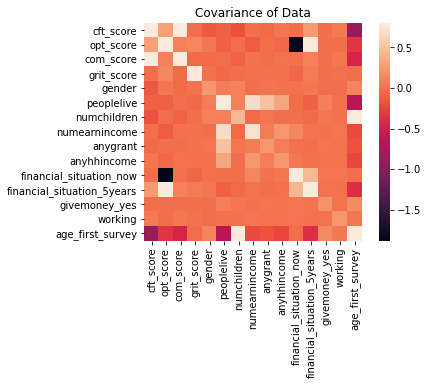

In [7]:
#analyze covariance of variables
data_covariance = df.cov()
sns.heatmap(data_covariance, vmax=.8, square=True)
plt.title("Covariance of Data")
plt.show()

High negative covariance:
- opt_score and financial_situation_now
- cft_score and age_first_survey
- peoplelive and age_first survey
- financial_situation_5years and age_first_survey
- opt_score and age_first_survey

High positive covariance:
- cft_score and com_score
- opt_score and financial_situation_5years
- peoplelive and anygrant
- numchildren and age_first_survey
- numearnincome and people live
- financial_situation_now and financial_situation_5years

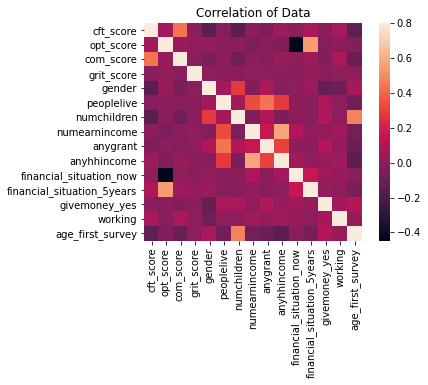

In [8]:
#analyze correlation of variables
data_corr = df.corr()
sns.heatmap(data_corr , vmax=.8, square=True)
plt.title("Correlation of Data")
plt.show()

High negative correlation:
 - optimism_score and financial_situation_now
 
High positive correlation:
 - cft_score and com_score
 - opt_score and financial_situation_5years
 - gender and numchildren
 - peoplelive and numearnincome
 - peoplelive and anygrant
 - peoplelive and anyhhincome
 - numchildren and age_first_survey
 - numearnincome and anyhhincome
 - anygrant and anyhhincome

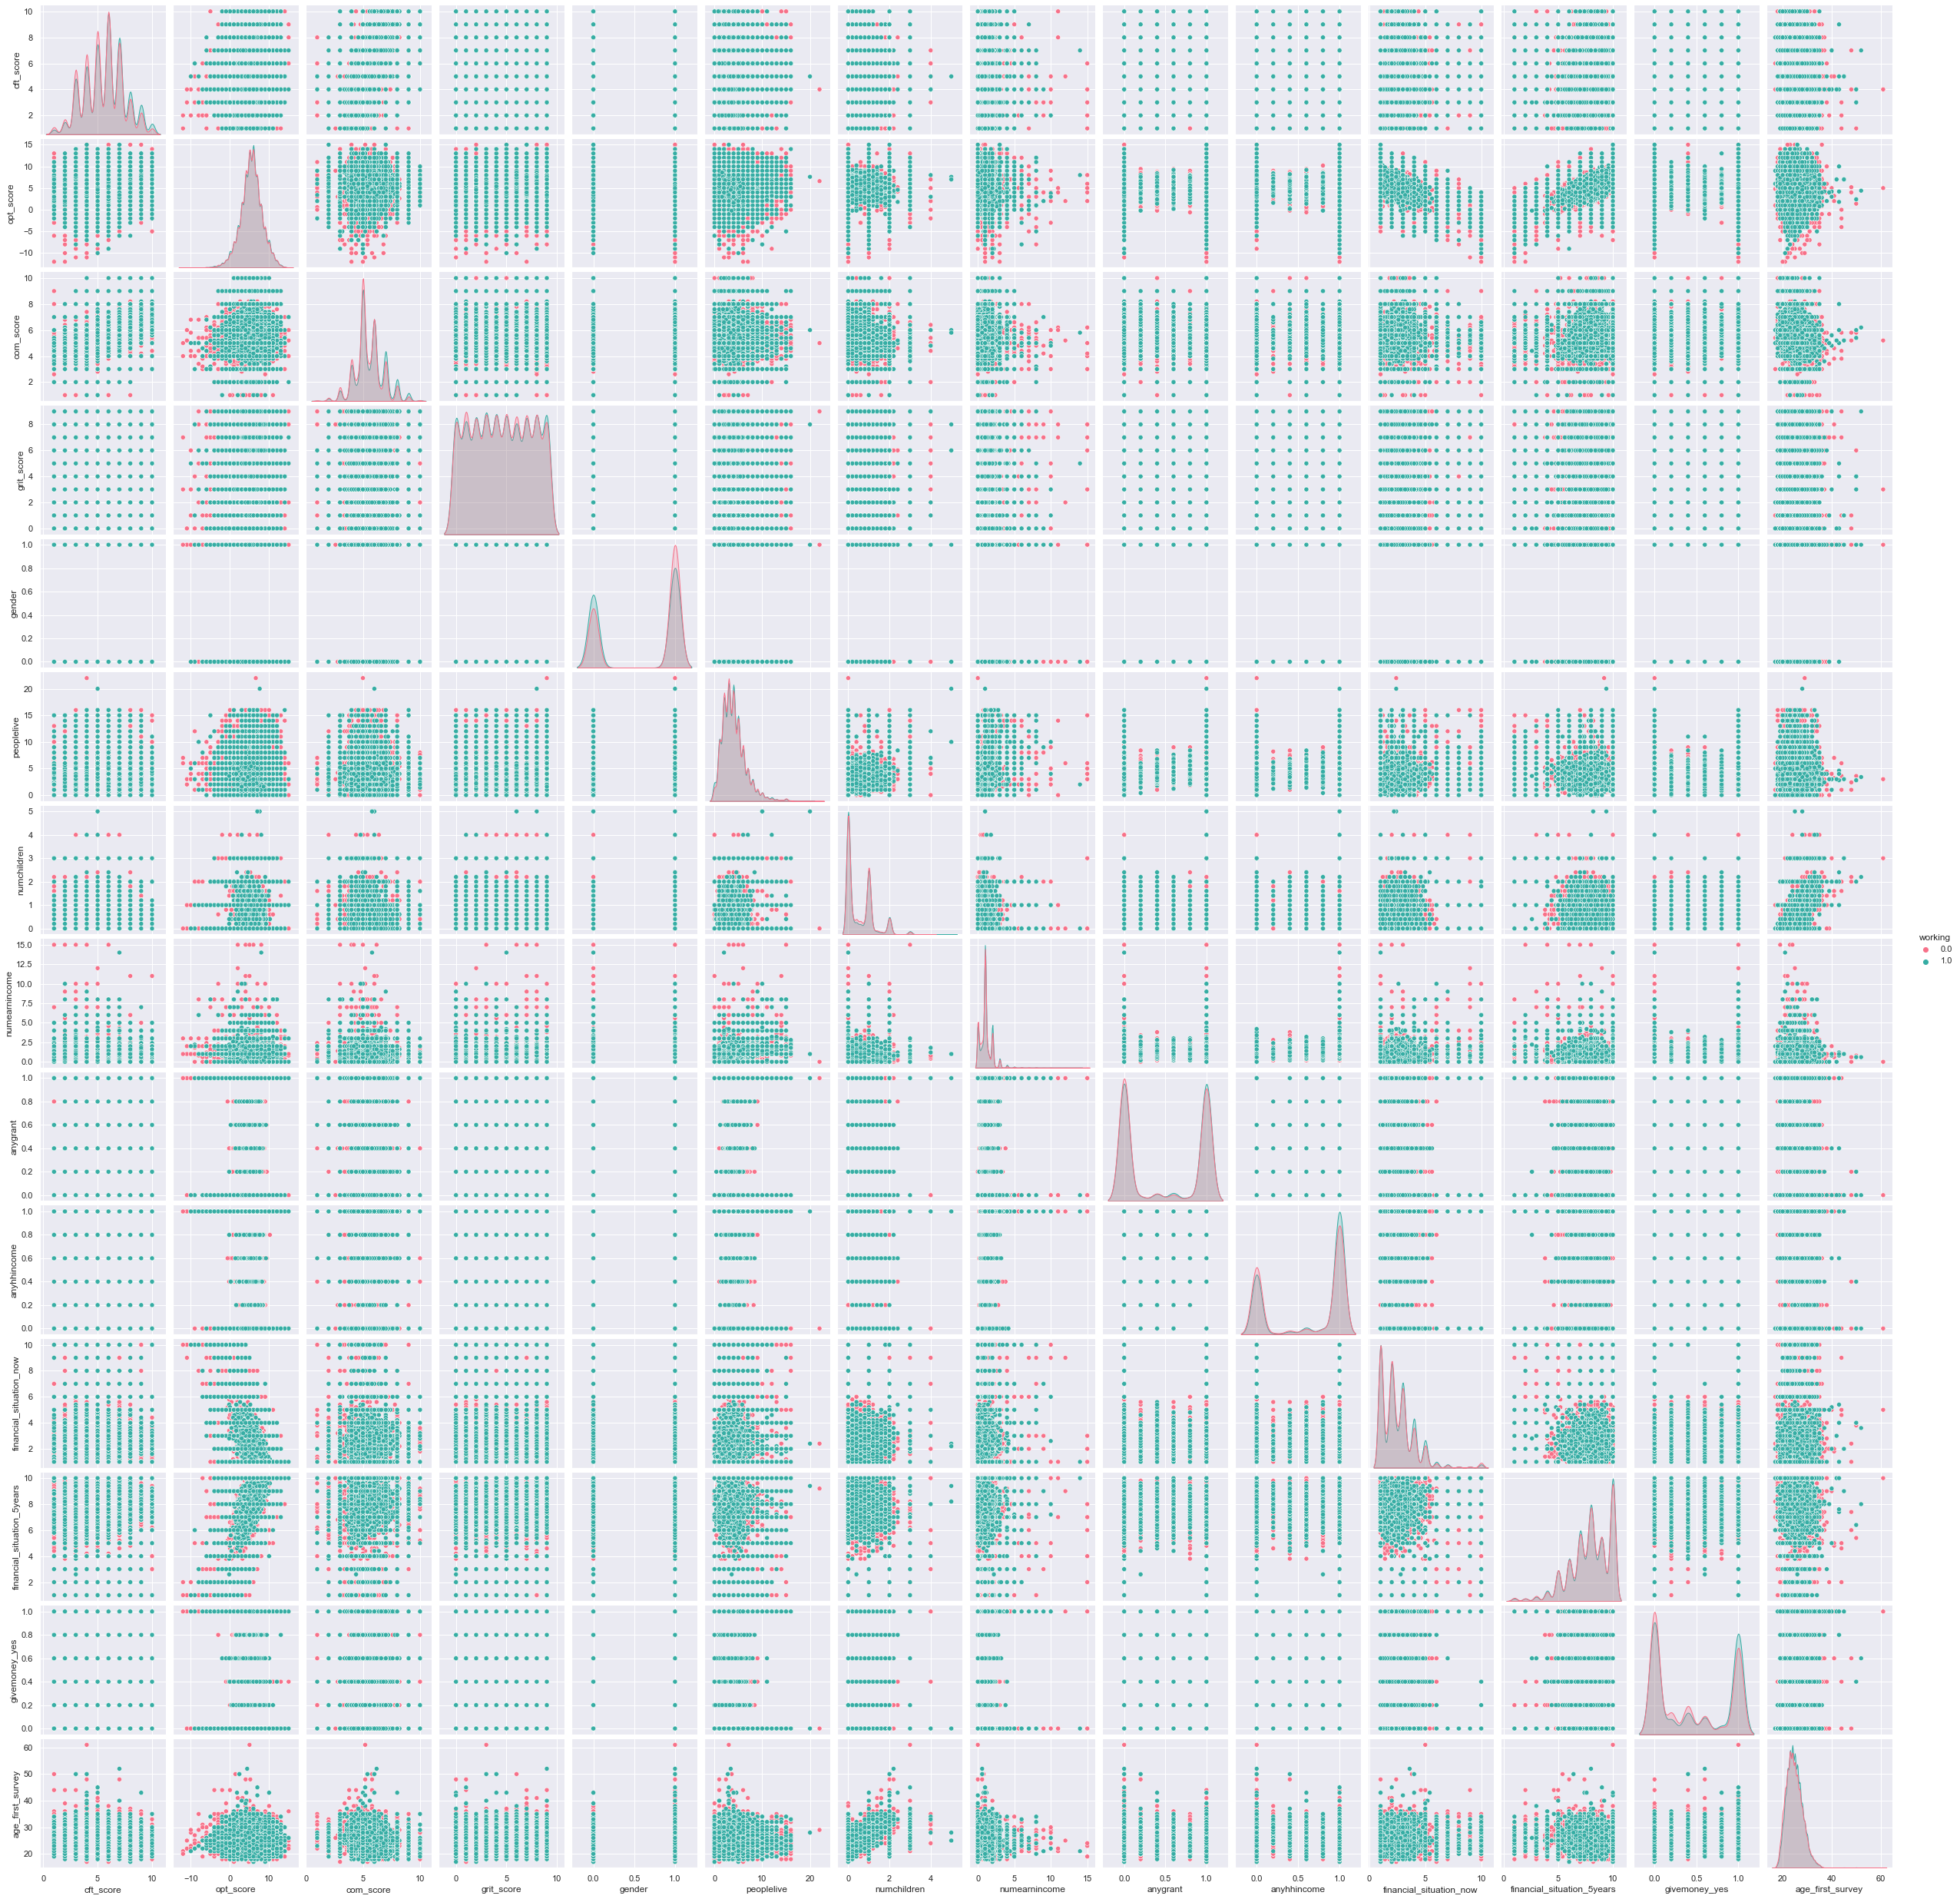

In [68]:
#scatterplot matrix to analyze effect size of variables on target (working)
sns.set(color_codes=True)
var = list(df.columns)
var.remove('working')
sns.pairplot(df, hue='working', vars = var, palette="husl")
plt.show()

Small effect:
    cft_score,
    grit_score,
    gender,
    anygrant,
    anyhhincome,
    financial_situation_5years,
    givemoney_yes
    
Medium effect:
    com_score,
    people_live,
    numchildren,
    financial_situation_now,
    age_first_survey 
    
Larger effect:
    opt_score,
    numearnincome

Working = green
Not working = red

In [19]:
#barplots to visualize individual variable relationships with target

<AxesSubplot:xlabel='cft_score', ylabel='working'>

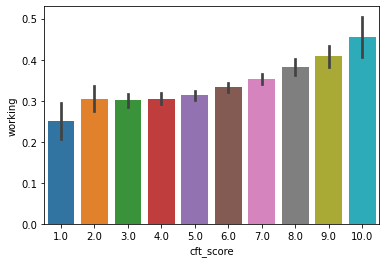

In [9]:
sns.barplot(x='cft_score',y='working',data=df)

<AxesSubplot:xlabel='working', ylabel='cft_score'>

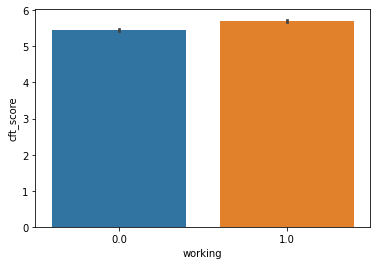

In [10]:
sns.barplot(x='working',y='cft_score',data=df)

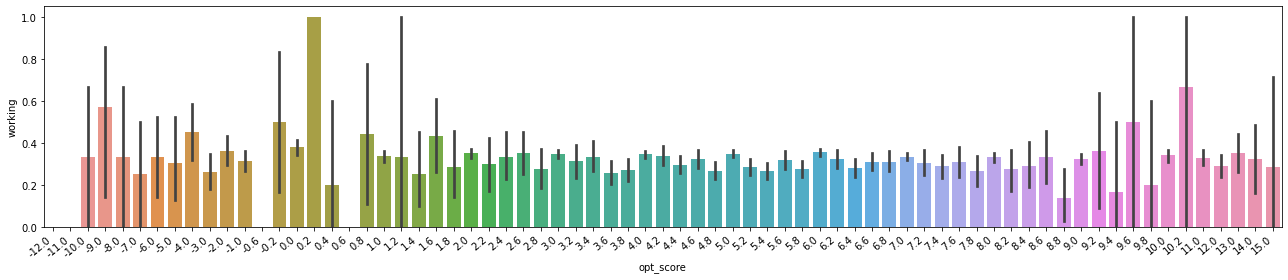

In [74]:
plt.figure(figsize=(18,4))
opt = sns.barplot(x='opt_score',y='working',data=df)
opt.set_xticklabels(opt.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='working', ylabel='opt_score'>

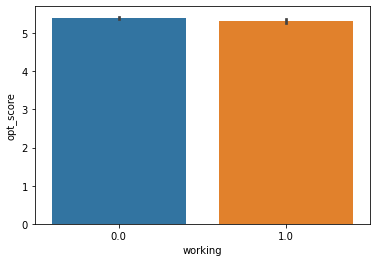

In [12]:
sns.barplot(x='working',y='opt_score',data=df)

In [13]:
len(df.opt_score.unique())

71

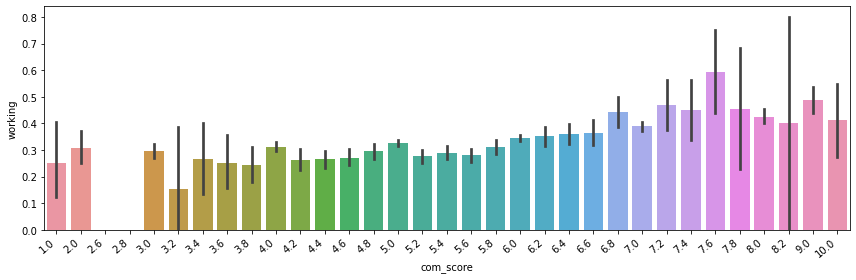

In [76]:
plt.figure(figsize=(12,4))
com = sns.barplot(x='com_score',y='working',data=df)
com.set_xticklabels(com.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='grit_score', ylabel='working'>

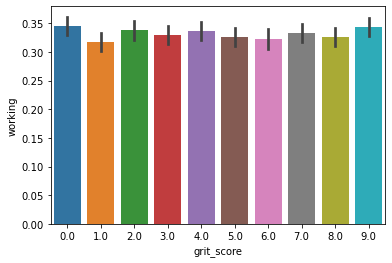

In [15]:
sns.barplot(x='grit_score',y='working',data=df)

<AxesSubplot:xlabel='gender', ylabel='working'>

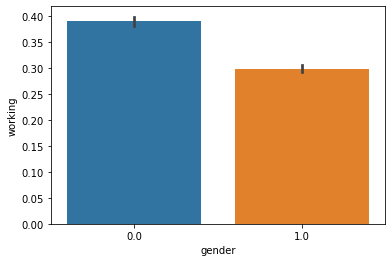

In [16]:
sns.barplot(x='gender',y='working',data=df)

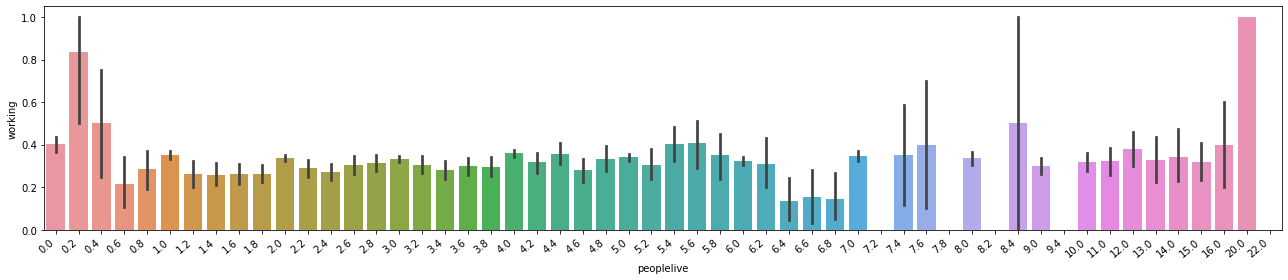

In [77]:
plt.figure(figsize=(18,4))
peo = sns.barplot(x='peoplelive',y='working',data=df)
peo.set_xticklabels(peo.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='numchildren', ylabel='working'>

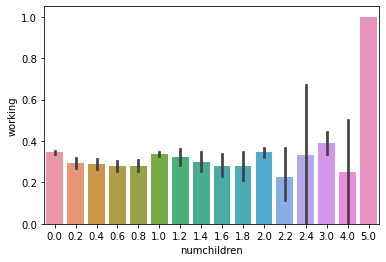

In [18]:
sns.barplot(x='numchildren',y='working',data=df)

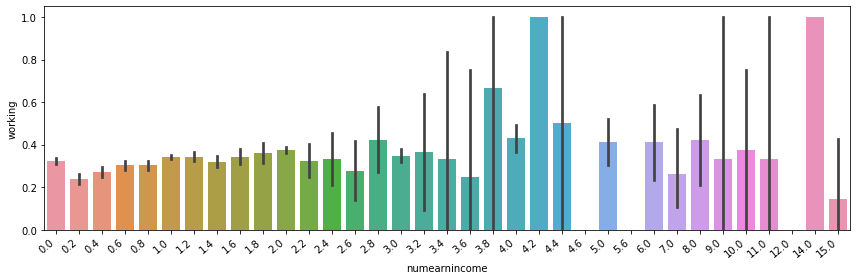

In [78]:
plt.figure(figsize=(12,4))
earn = sns.barplot(x='numearnincome',y='working',data=df)
earn.set_xticklabels(earn.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='anygrant', ylabel='working'>

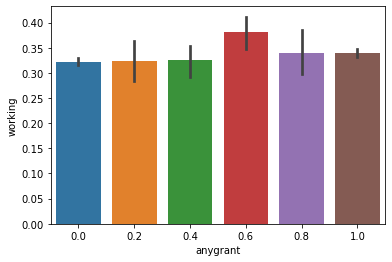

In [20]:
sns.barplot(x='anygrant',y='working',data=df)

<AxesSubplot:xlabel='anyhhincome', ylabel='working'>

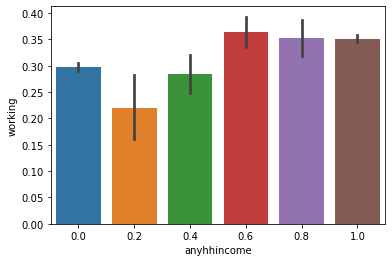

In [21]:
sns.barplot(x='anyhhincome',y='working',data=df)

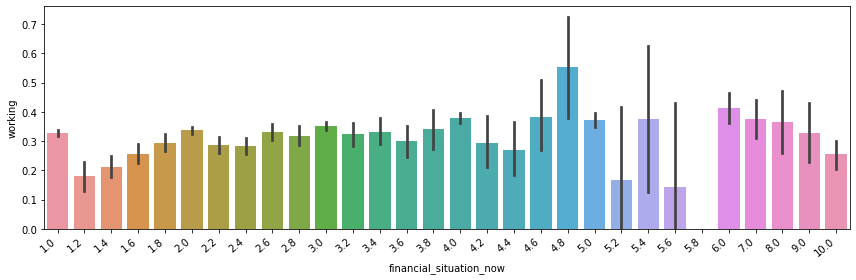

In [79]:
plt.figure(figsize=(12,4))
fin = sns.barplot(x='financial_situation_now',y='working',data=df)
fin.set_xticklabels(fin.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

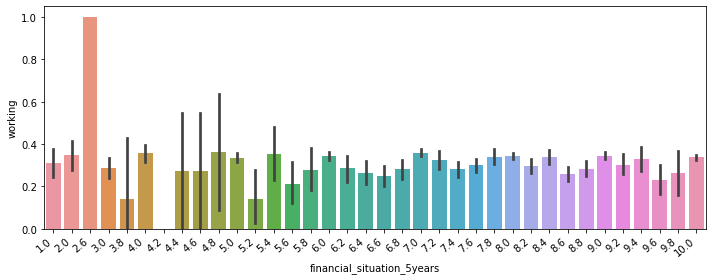

In [72]:
plt.figure(figsize=(10,4))
ax = sns.barplot(x='financial_situation_5years',y='working',data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='givemoney_yes', ylabel='working'>

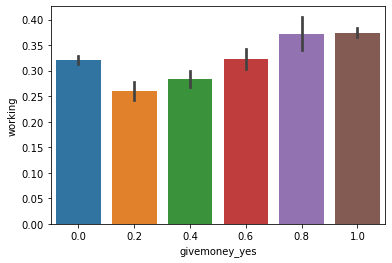

In [24]:
sns.barplot(x='givemoney_yes',y='working',data=df)

In [5]:
#scale data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df)

MinMaxScaler()

In [6]:
df_scaled = scaler.transform(df)
df_scaled = pd.DataFrame(             
                    df_scaled,
                    columns=df.columns) 

df_scaled.head()

,cft_score,opt_score,com_score,grit_score,gender,peoplelive,numchildren,numearnincome,anygrant,anyhhincome,financial_situation_now,financial_situation_5years,givemoney_yes,working,age_first_survey
0,0.333333,0.614815,0.333333,0.444444,1.0,0.163636,0.16,0.053333,0.0,0.0,0.200000,0.822222,0.4,1.0,0.204545
1,0.333333,0.703704,0.444444,0.333333,1.0,0.090909,0.60,0.066667,1.0,1.0,0.111111,0.777778,0.0,1.0,0.250000
2,0.444444,0.555556,0.444444,0.222222,0.0,0.181818,0.20,0.066667,0.0,1.0,0.000000,0.000000,0.0,1.0,0.181818
3,1.000000,0.592593,0.622222,0.000000,1.0,0.318182,0.00,0.066667,1.0,1.0,0.000000,0.666667,0.0,1.0,0.068182
4,0.666667,0.607407,0.444444,0.444444,0.0,0.127273,0.04,0.080000,0.4,0.6,0.333333,0.800000,1.0,0.0,0.090909


In [7]:
#import KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

In [8]:
#split data into training and testing sets
from sklearn.model_selection import train_test_split
X, X_test, y, y_test = train_test_split(df.drop(['working'],axis=1), df['working'], test_size = 0.20)

In [9]:
#store the results
results = pd.DataFrame(columns = ['train accuracy','test accuracy'])

def score_model(model):
    model_name=type(model).__name__
    Y_pred = model.predict(X_test)
    accuracy_train = round(model.score(X, y) * 100, 2)
    accuracy_test = round(model.score(X_test, y_test) * 100, 2)
    print([accuracy_train, accuracy_test])
    results.loc[model_name]=[accuracy_train, accuracy_test]

In [10]:
#fit the KNN Classifier on the training data (all variables)
#compare accuracy to testing data
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X,y)
score_model(knn)

[75.02, 63.49]


In [11]:
y_pred = knn.predict(X_test)

In [12]:
#evaluate metrics 
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3599  774]
 [1627  576]]
              precision    recall  f1-score   support

         0.0       0.69      0.82      0.75      4373
         1.0       0.43      0.26      0.32      2203

    accuracy                           0.63      6576
   macro avg       0.56      0.54      0.54      6576
weighted avg       0.60      0.63      0.61      6576



In [13]:
#generate confusion matrix
cf_matrix = confusion_matrix(knn.predict(X_test),y_test)

In [14]:
tn, fn, fp, tp = confusion_matrix(knn.predict(X_test),y_test).ravel()
print(tn, fn, fp, tp)

3599 1627 774 576


<AxesSubplot:>

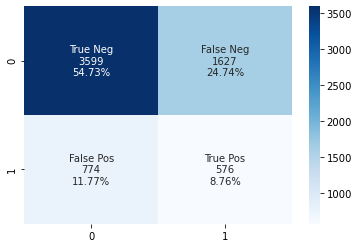

In [15]:
group_names = ['True Neg','False Neg','False Pos','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [16]:
y_score = knn.fit(X, y)

In [17]:
#evaluate ROC score and ROC curve
from sklearn.metrics import roc_auc_score, auc

In [18]:
roc_auc_score(y_test, y_pred)

0.5422332227045442

In [19]:
from sklearn.metrics import roc_curve

In [20]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

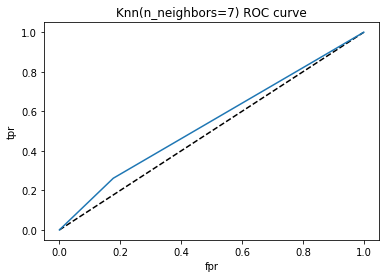

In [21]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=7) ROC curve')
plt.show()

In [58]:
#calculate error rate for different values of k
error_rate = []
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X,y)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

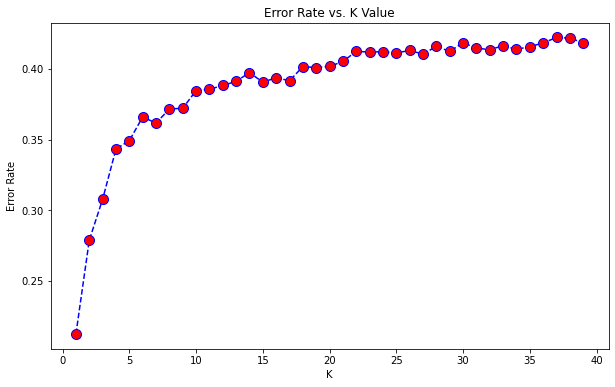

In [59]:
#plot error rate to determine optimal value of k 
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [23]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [24]:
#performance of logistic regression on same sets
logisticregression = LogisticRegression(solver='lbfgs')
logisticregression.fit(X, y)
score_model(logisticregression)

[66.82, 67.15]


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
#performance of decision tree on same sets
tree = DecisionTreeClassifier(max_depth=4)
tree.fit(X,y)
score_model(tree)

[66.81, 66.23]


In [26]:
#performance of random forest on same sets
rf=RandomForestClassifier(n_estimators=1000,max_depth=3,max_features=3)
rf.fit(X,y)
score_model(rf)

[66.71, 67.17]


In [36]:
#performance of decision tree on same sets
xt=ExtraTreesClassifier(n_estimators=1000,max_depth=3,max_features=3)
xt.fit(X,y)
score_model(xt)

[66.62, 67.52]


In [38]:
#performance of support vector classifier on same sets
svm=SVC(C=1,kernel='rbf',gamma='auto')
svm.fit(X,y)
score_model(svm)

[70.89, 67.38]


In [39]:
#performance of ensemble model 
ensemble_model=VotingClassifier(estimators=[('xt',xt),('rf',rf),('knn',knn),('svm',svm),('lr',logisticregression)] , voting='hard')
ensemble_model.fit(X,y)
score_model(ensemble_model)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[67.08, 67.66]


FEATURE SELECTED MODELS (Large & Medium Effect)

In [22]:
#create new data frame with only medium and large effect size variables
lmdf = df_scaled.drop(['cft_score', 'grit_score', 'gender', 'anygrant', 'anyhhincome', 'financial_situation_5years', 'givemoney_yes'], axis=1)

In [23]:
lmdf.head()

,opt_score,com_score,peoplelive,numchildren,numearnincome,financial_situation_now,working,age_first_survey
0,0.614815,0.333333,0.163636,0.16,0.053333,0.200000,1.0,0.204545
1,0.703704,0.444444,0.090909,0.60,0.066667,0.111111,1.0,0.250000
2,0.555556,0.444444,0.181818,0.20,0.066667,0.000000,1.0,0.181818
3,0.592593,0.622222,0.318182,0.00,0.066667,0.000000,1.0,0.068182
4,0.607407,0.444444,0.127273,0.04,0.080000,0.333333,0.0,0.090909


In [24]:
#split into train and test data
X, X_test, y, y_test = train_test_split(lmdf.drop(['working'],axis=1), lmdf['working'], test_size = 0.20)

In [25]:
#assess performance of knn on modified dataset
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X,y)
score_model(knn)

[73.89, 61.33]


In [26]:
#assess ROC score
roc_auc_score(y_test, y_pred)

0.5027028313646198

In [27]:
y_pred = knn.predict(X_test)

In [32]:
#assess evaluation metrics
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

classification = classification_report(y_test, y_pred)

[[3492  906]
 [1637  541]]
              precision    recall  f1-score   support

         0.0       0.68      0.79      0.73      4398
         1.0       0.37      0.25      0.30      2178

    accuracy                           0.61      6576
   macro avg       0.53      0.52      0.52      6576
weighted avg       0.58      0.61      0.59      6576



In [60]:
classsmall = [('accuracy', 0.64), ('', 0.61), ('precision', 0.69), ('', 0.68), ('recall', 0.83), ('',0.79), ('F1', 0.75), ('',0.73)]

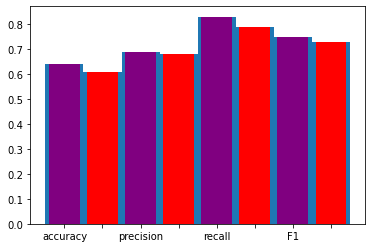

In [61]:
#visualize evaluation metrics                                                          
import matplotlib.pyplot as plt  

labels, ys = zip(*classsmall)
xs = np.arange(len(labels)) 
width = 1

fig = plt.figure()                                                               
ax = fig.gca()  #get current axes
ax.bar(xs, ys, width, align='center')

ax.set_xticks(xs)
ax.set_xticklabels(labels)

plt.bar(xs, ys, color=['purple', 'red', 'purple', 'red', 'purple', 'red', 'purple', 'red'])


plt.show()

In [64]:
perform = [('training', 75.24), ('', 64.01), ('testing', 73.89), ('', 61.33)]

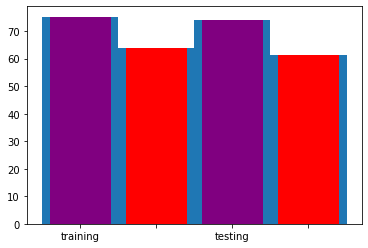

In [65]:
#compare performance on training and testing data
import matplotlib.pyplot as plt  

labels, ys = zip(*perform)
xs = np.arange(len(labels)) 
width = 1

fig = plt.figure()                                                               
ax = fig.gca()  #get current axes
ax.bar(xs, ys, width, align='center')

ax.set_xticks(xs)
ax.set_xticklabels(labels)

plt.bar(xs, ys, color=['purple', 'red', 'purple', 'red'])


plt.show()

In [29]:
cf_matrix = confusion_matrix(knn.predict(X_test),y_test)

In [30]:
tn, fn, fp, tp = confusion_matrix(knn.predict(X_test),y_test).ravel()
print(tn, fn, fp, tp)

3492 1637 906 541


<AxesSubplot:>

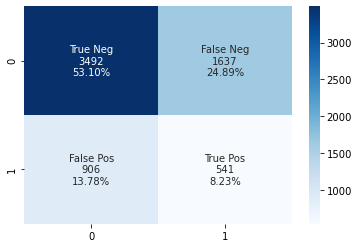

In [31]:
#visualize confusion matrix
group_names = ['True Neg','False Neg','False Pos','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')